## Data analysis

In [1]:
from l_p2 import persistence_length
import matplotlib.pyplot as plt
import numpy as np
import scipy
import MDAnalysis as mda
from MDAnalysis.analysis import polymer
import glob
import pandas as pd
from scipy.stats import linregress
import os

ref_length = 0.3563594872561357

In [3]:
# Getting a sorted list of the 10mer trajectories
path = os.getcwd() # Non-user specific path
molecule_list = sorted(glob.glob("/home/jbieri/CME_lab/repos/pl-validation/gsd_files/10_mers/"+"*.gsd"))
p_lens = []

### Calculating persistence lengths:

In [72]:
for i in range(len(molecule_list)):
    h = persistence_length(filepath=molecule_list[i],
                       start=1,
                      stop=-1,
                      interval=10)
    l_p = h[0]
    l_b = h[1]
    x_values = h[2]
    C_n = h[3]
    exp_fit = h[4]
    decorr = h[-2]
    p_lens.append(l_p*ref_length*10)

persistence length: 3.994757517346658 ang


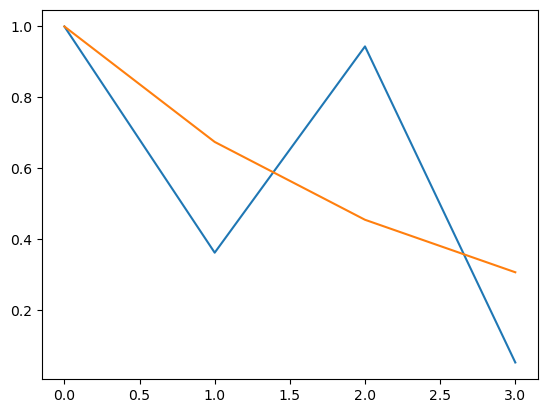

In [55]:
print('persistence length:',l_p*ref_length*10, 'ang')
plt.plot(C_n)
plt.plot(exp_fit)

In [56]:
names = ['PCPDTFBT_C11_BO', 'PCPDTFBT_C1_BO', 'PCPDTFBT_C3_BO', 'PCPDTFBT_C4_BO', 'PCPDTFBT_C5_BO', 'PCPDTPT_HD', 'PCPDTPT_ODD', 'PCPDTPT_eneODD', 'PCPDTPT_nC16', 'PCPDT_PT_eneHD']
measured_pl = [291.0, 67.0,78.4,86.4,114.0,47.3,54.9,83.4,61.0,76.6] # Measured persistence length using SANS

In [57]:
differences = np.array(measured_pl) - np.array(p_lens)

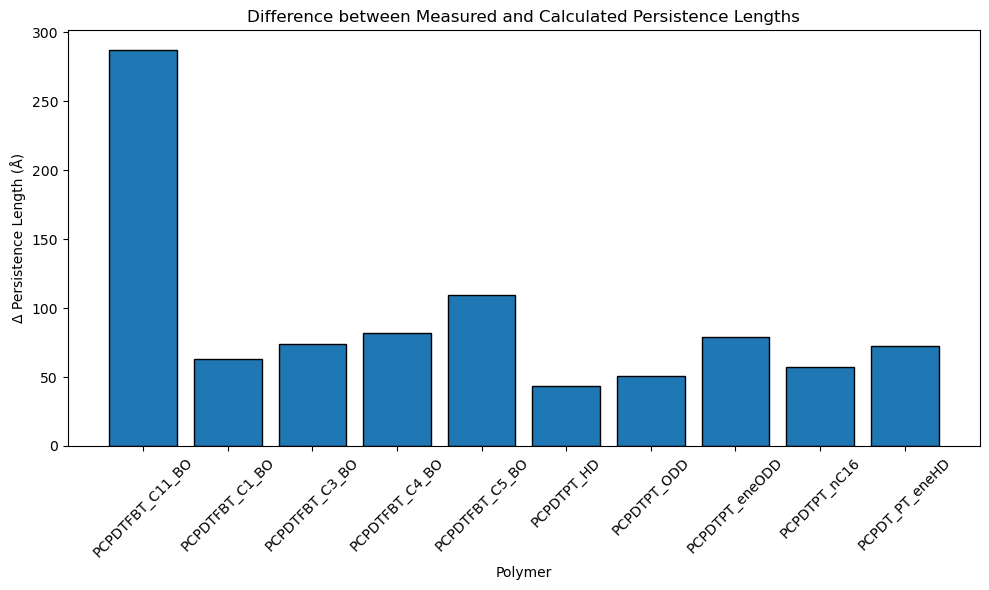

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(names, differences, edgecolor='black')

plt.xlabel('Polymer')
plt.ylabel('Δ Persistence Length (Å)')
plt.title('Difference between Measured and Calculated Persistence Lengths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Persistence Length (Å)')

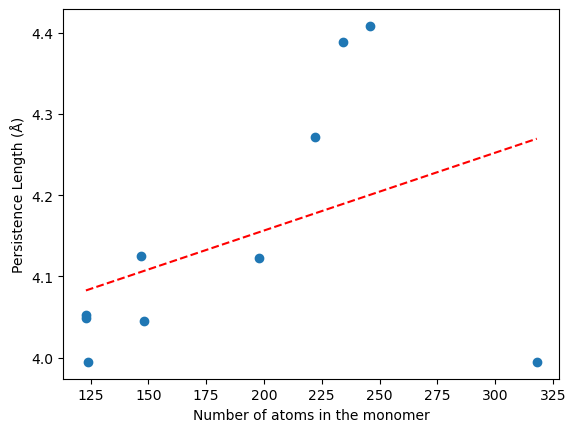

In [60]:
lengths = [318, 198, 222, 234, 246, 123, 147, 148, 123, 124] # [3162, 1962, 2202, 2322, 2442, 1212, 1452, 1462, 1212, 1222]


plt.scatter(lengths, p_lens)
coeffs = np.polyfit(lengths, p_lens, 1)
best_fit = np.poly1d(coeffs)

x_fit = np.linspace(min(lengths), max(lengths), 100)
y_fit = best_fit(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--')
plt.xlabel('Number of atoms in the monomer')
plt.ylabel('Persistence Length (Å)')


In [42]:
slope, intercept, r_value, p_value, std_err = linregress(lengths, p_lens)

print("Slope:", slope)
print("Intercept:", intercept)
print("R value:", r_value)
print("R-squared:", r_value**2)

Slope: 9.579324454603821e-05
Intercept: 3.9666345743233595
R value: 0.4070421330197566
R-squared: 0.16568329805327323


Text(0, 0.5, 'Persistence Length (Å)')

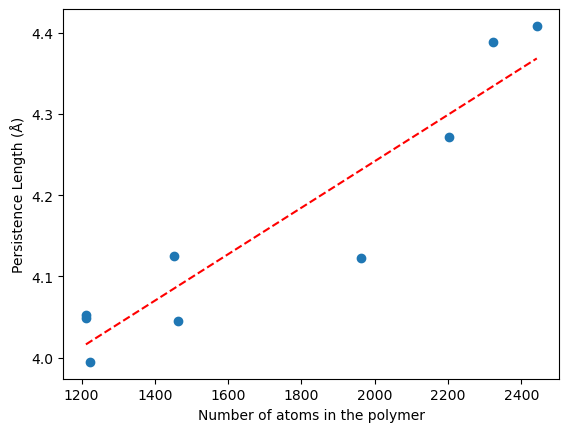

In [46]:
nlen = lengths.copy()
nnames= names.copy()
np_lens = p_lens.copy()
nlen.pop(0)
nnames.pop(0)
np_lens.pop(0)

plt.scatter(nlen, np_lens)
coeffs = np.polyfit(nlen, np_lens, 1)
best_fit = np.poly1d(coeffs)

x_fit = np.linspace(min(nlen), max(nlen), 100)
y_fit = best_fit(x_fit)
plt.plot(x_fit, y_fit, color='red', linestyle='--')
plt.xlabel('Number of atoms in the polymer')
plt.ylabel('Persistence Length (Å)')


In [48]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(nlen, np_lens)

print("Slope:", slope)
print("Intercept:", intercept)
print("R value:", r_value)
print("R-squared:", r_value**2)

Slope: 0.0002862139065569344
Intercept: 3.669436810731945
R value: 0.9377548518481916
R-squared: 0.8793841621648238


In [62]:
h = persistence_length(filepath="/home/jbieri/CME_lab/repos/pl-validation/gsd_files/10_mers/PCPDTPT_nC16_melt.gsd",
                   start=1,
                  stop=-1,
                  interval=10)
l_p = h[0]
l_b = h[1]
x_values = h[2]
C_n = h[3]
exp_fit = h[4]
decorr = h[-2]
p_lens.append(l_p*ref_length*10)

persistence length: 4.052426518808798 ang


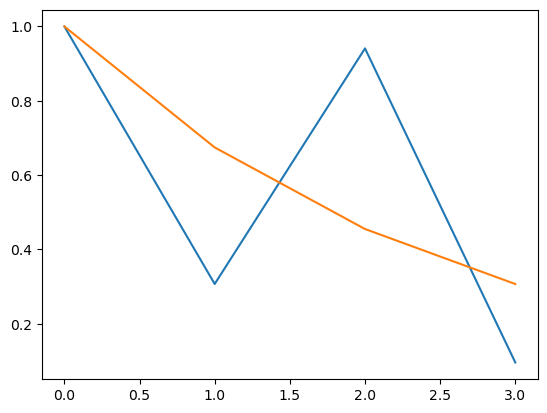

In [63]:
print('persistence length:',l_p*ref_length*10, 'ang')
plt.plot(C_n)
plt.plot(exp_fit)

In [78]:
data = {"Polymer": names, "Persistence length (Å)": p_lens}
df = pd.DataFrame(data)

In [79]:
print(df)

           Polymer  Persistence length (Å)
0  PCPDTFBT_C11_BO                3.995077
1   PCPDTFBT_C1_BO                4.123044
2   PCPDTFBT_C3_BO                4.271965
3   PCPDTFBT_C4_BO                4.388570
4   PCPDTFBT_C5_BO                4.408379
5       PCPDTPT_HD                4.048631
6      PCPDTPT_ODD                4.124787
7   PCPDTPT_eneODD                4.045253
8     PCPDTPT_nC16                4.052427
9   PCPDT_PT_eneHD                3.994758


In [2]:
import MDAnalysis.coordinates.GSD as gsd_reader
from grits import utils
import gsd.hoomd

/home/jbieri/miniforge3/envs/p_l/lib/python3.11/site-packages/foyer/forcefield.py:34: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import iter_entry_points, resource_filename
/home/jbieri/miniforge3/envs/p_l/lib/python3.11/site-packages/pkg_resources/__init__.py:3146: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)



Support for writing out LAMMPS data files will be removed
in mbuild 1.0.
See GMSO (https://github.com/mosdef-hub/gmso/tree/main/gmso/formats/lammpsdata) for
continued support for LAMMPS.



In [21]:
def pl(gsd_file, atom_index=1, start=0, stop=None, stride=1):
    persistence_lengths = []
    new_traj = gsd.hoomd.open("/home/jbieri/CME_lab/repos/pl-validation/PCPDTFBT_C4_BO_10mer_linear_test2.gsd","w")
    with gsd.hoomd.open(gsd_file) as traj: # Opening gsd file as traj
        for snap in traj[start:stop:stride]: # Looping through each frame
            pos = snap.particles.position
            monomer_num = int(len(pos)/10)
            frame = []
            for atom in pos[::monomer_num]: # Looping through each monomer in the frame
                frame.append(pos[atom_index])
            new_traj.append(frame)
    
    persistence_lengths = persistence_length(new_traj)
    return persistence_lengths


In [22]:
bruh = pl("/home/jbieri/CME_lab/repos/pl-validation/PCPDTFBT_C4_BO_10mer_linear_test.gsd")

AttributeError: 'list' object has no attribute 'validate'